# Heart diseases data set

## 1. Importation

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1, 2, 3, 4) from absence (value 0).

Only 14 attributes used:
1. age: age in year
2. sex: sex
    - 0 = female
    - 1 = male
3. cp : type de douleur thoracique
   - 1 = typical angina 
   - 2 = atypical angina 
   - 3 = non-anginal pain 
   - 4 = asymptomatic
4. trestbps : resting blood pressure (in mm Hg on admisison to the hospital)
5. chol : sérum cholestoral (in mg/dl)
6. fbs: fasting blood sugar (> 120 mg / dl) 
    * 1 = True
    * 0 = false
7. restecg: resting electocardiographic results
    - 0 = normal
    - 1 = having ST-T wave abnormality
    - 2 = hypertrophy
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina
    - 0 = no
    - 1 = yes
10. oldpeak: depression induced by exercise relative to rest
11. slope: the slope of the peak exercise
    - 1 = increasing
    - 2 = constant
    - 3 = decreasing
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 
    - 3 = normal
    - 6 = fixed defect
    - 7 = revrsible defect
14. num (the predicted attribute) : diagnosis of hearth disease
    - value 0: < 50%
    - value 1: > 50%

In [ ]:
!pip install missingno

In [1]:
# import library  
import numpy as np
import pandas as pd 
import seaborn as sns
import missingno as msno 
import matplotlib.pyplot as plt

In [9]:
## create a data frame

# variable name list
variables = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", 
             "num"]

# loading dataset in a dataframe
heart_df = pd.read_csv("dataset/processed.cleveland.data", sep=",", names=variables, na_values="?");

# print 5 first observations 
heart_df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [10]:
# data types
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [7]:
print(heart_df['ca'].unique())
print(heart_df['thal'].unique())
#na_values="?"

['0.0' '3.0' '2.0' '1.0' '?']
['6.0' '3.0' '7.0' '?']


## 2. Data Cleaning

### 2.1 Check the data type

* **Binary**: sex, fbs, exang, target
* **Categorial**: cp, restecg, slope, ca, thal
* **Continous**: age, trestbps, chol, thalac, oldpeak

In [25]:
# numeric (integer) variables
int_col = ["age", "trestbps", "chol", "thalach"] 

# alphanumeric variables
cat_col = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]


# convert types
for column in int_col:
    if heart_df[column].isna().sum() > 0:
        heart_df[column].astype(int)
            

for column in int_col:
    if heart_df[column].isna().sum() > 0:
        heart_df[column].astype(str)

In [26]:
heart_df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1


### 2.2 Missing values

In [27]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

<AxesSubplot:>

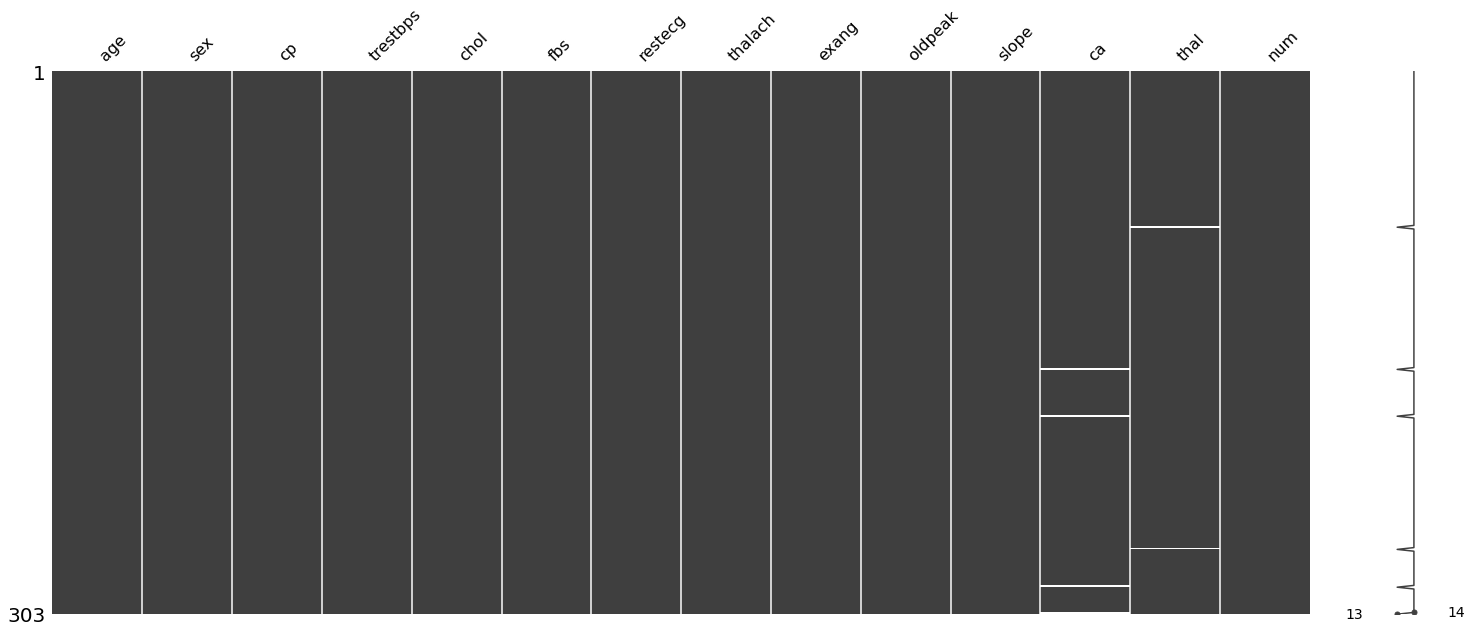

In [30]:
# visualize missing value
msno.matrix(heart_df)

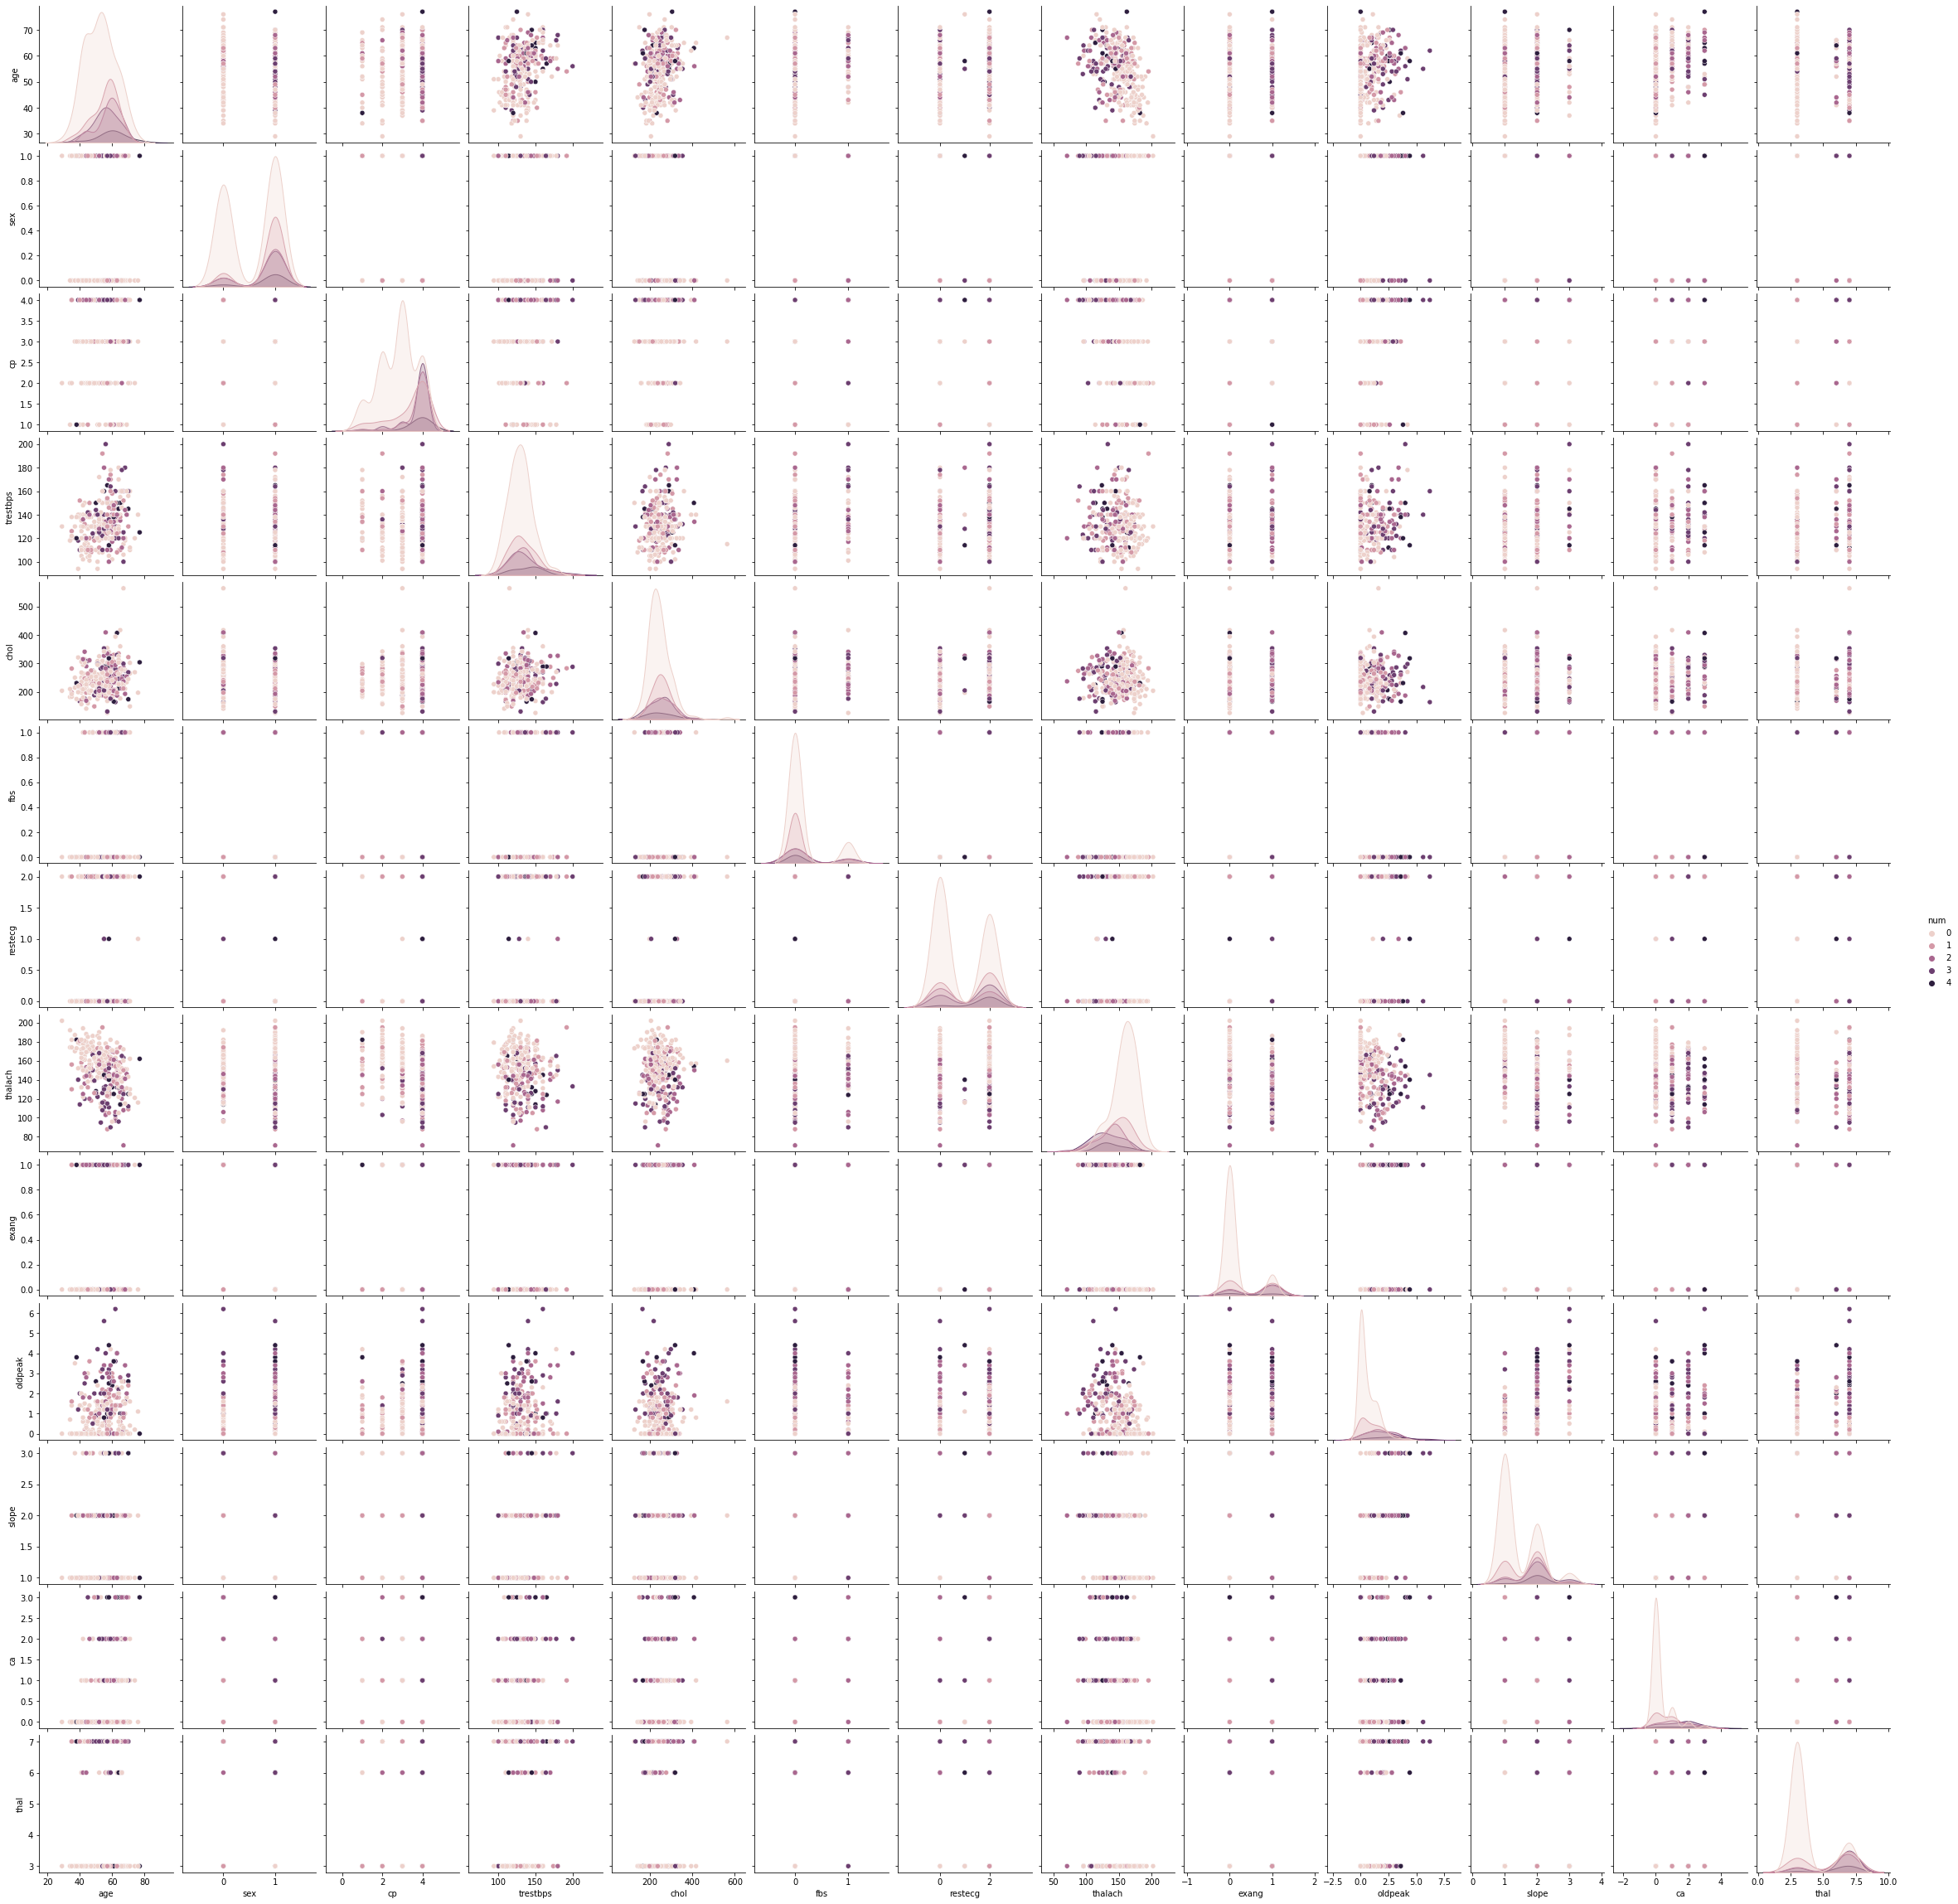

In [34]:
# pairwise graphic
sns.pairplot(heart_df, hue='num')

<AxesSubplot:xlabel='num', ylabel='age'>

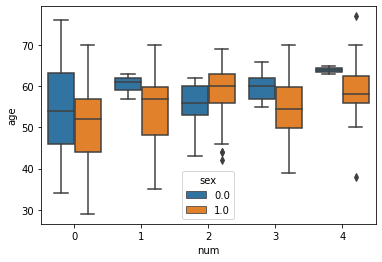

In [38]:
sns.boxplot(x='num', y='age', data=heart_df, hue='sex')

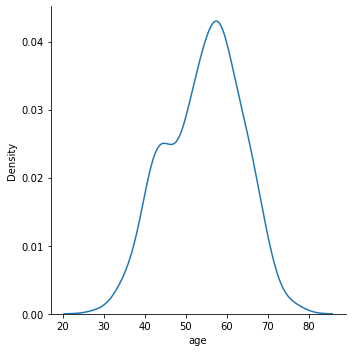

In [40]:
sns.displot(heart_df['age'], kind='kde')